In [3]:
# Call the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime
import time

In [4]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)
coordinates

[(15.25491838129581, 99.93192111242104),
 (44.11596366353032, -42.931536353750005),
 (-51.18442510160792, 68.50206654384877),
 (32.58193581937243, 42.23972914626998),
 (-87.62659959643982, -144.94027175287513),
 (3.0534968620765, 131.33291762887882),
 (-38.055660024070605, 33.978106678576864),
 (5.653141251205909, -22.3006107973591),
 (-27.427571205048643, -103.71752730290824),
 (-49.80376288228721, -179.2692964525293),
 (-34.25445828859298, -33.448565393160465),
 (27.777380786033717, 84.45279762718121),
 (61.32490886504115, 146.51622364653298),
 (-61.372837798990844, -2.632354321759067),
 (60.40082352663802, 50.534092517938404),
 (-52.4801314217632, -42.1425518005195),
 (-4.821861083371871, 136.83729810372927),
 (-79.78877119945545, 12.094985707705746),
 (50.63530402396239, -18.062038518108324),
 (-63.4422824409329, -64.6888352411711),
 (6.260891492845133, -64.85729669044548),
 (-5.339514173674857, 177.48038326824997),
 (88.96952317314341, -69.09896877037451),
 (-44.25381749141536, 49

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

mataura pf
port alfred za
kavaratti in
busselton au
cidreira br
ushuaia ar
jasper ca
taolanaro mg
yellowknife ca
mount isa au
tateyama jp
hermanus za
geraldton ca
new norfolk au
rikitea pf
ponta do sol cv
qaanaaq gl
emmerich de
chernyshevskiy ru
luanda ao
coria es
majene id
butaritari ki
tuatapere nz
jamestown sh
hermanus za
kanniyakumari in
atuona pf
yulara au
ushuaia ar
denizli tr
kremenchuk ua
lethem gy
kitob uz
avarua ck
cape town za
les cayes ht
norman wells ca
phan rang vn
hobart au
deputatskiy ru
khatanga ru
wukari ng
illoqqortoormiut gl
busselton au
bambous virieux mu
kapaa us
barentsburg sj
busselton au
san patricio mx
ushuaia ar
khatanga ru
paracatu br
mezen ru
torbay ca
mataura pf
the valley ai
bluff nz
hithadhoo mv
vestmanna fo
barentsburg sj
grindavik is
katsuura jp
rikitea pf
vaitupu wf
luderitz na
georgetown sh
srednekolymsk ru
hilo us
touros br
punta arenas cl
port elizabeth za
bluff nz
thompson ca
severo-kurilsk ru
jiaonan cn
busselton au
busselton au
dingle ie
nemuro 

hilo us
hun ly
clearlake us
lompoc us
bluff nz
punta arenas cl
laon fr
ushuaia ar
vaini to
monte alegre de minas br
yar-sale ru
busayra jo
bousso td
tiksi ru
carsamba tr
punta arenas cl
busselton au
swidnik pl
new norfolk au
east london za
mataura pf
qaanaaq gl
megion ru
coquimbo cl
labuhan id
port alfred za
ushuaia ar
illoqqortoormiut gl
port said eg
sao filipe cv
tiksi ru
herat af
kudat my
kudahuvadhoo mv
zyryanka ru
faya td
provideniya ru
hervey bay au
taolanaro mg
busselton au
castro cl
ritchie za
jerusalem il
grand river south east mu
punta arenas cl
antofagasta cl
hermanus za
egvekinot ru
ushuaia ar
puerto ayora ec
athabasca ca
carnarvon au
ushuaia ar
sitka us
atar mr
geraldton au
souillac mu
dikson ru
hithadhoo mv
dukat ru
xinye cn
valea mare-pravat ro
mountain home us
skelleftea se
kapaa us
tomball us
vagay ru
hunza pk
nikolskoye ru
hobart au
dingzhou cn
lufilufi ws
butaritari ki
qaanaaq gl
atuona pf
swan hill au
arraial do cabo br
sinnamary gf
arraial do cabo br
pangnirtung ca

vardo no
rikitea pf
kruisfontein za
port alfred za
celestun mx
svobodnyy ru
bratsk ru
torbay ca
stawell au
castro cl
rikitea pf
geraldton au
abiy adi et
punta arenas cl
broken hill au
mataura pf
cascais pt
provideniya ru
hare bay ca
mahebourg mu
tasiilaq gl
galle lk
hobyo so
kjollefjord no
bilgoraj pl
thompson ca
esperance au
narsaq gl
punta arenas cl


In [6]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

625

In [10]:
# Starting URL for Weather API Key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e48fcc455f70815844f3139909a02fb8


In [14]:
# Create an empty list to hold weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [17]:
# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count += 1
        
    # Create endpoint URL with each city
    city_url = url +"&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count +=1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_description = city_description["weather"]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Description": city_description})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 638 of Set 13 | mataura
Processing Record 639 of Set 13 | port alfred
Processing Record 640 of Set 13 | kavaratti
Processing Record 641 of Set 13 | busselton
Processing Record 642 of Set 13 | cidreira
Processing Record 643 of Set 13 | ushuaia
Processing Record 644 of Set 13 | jasper
Processing Record 645 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 646 of Set 13 | yellowknife
Processing Record 647 of Set 13 | mount isa
Processing Record 648 of Set 13 | tateyama
Processing Record 649 of Set 13 | hermanus
Processing Record 650 of Set 13 | geraldton
Processing Record 651 of Set 13 | new norfolk
Processing Record 652 of Set 13 | rikitea
Processing Record 653 of Set 13 | ponta do sol
Processing Record 654 of Set 13 | qaanaaq
Processing Record 655 of Set 13 | emmerich
Processing Record 656 of Set 13 | chernyshevskiy
Processing Record 657 of Set 13 | luanda
Processing Record 658 of Set 13 | coria
Processing Record 659 of Set 13 | majene
Processing Reco

Processing Record 823 of Set 16 | victor harbor
Processing Record 824 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 825 of Set 16 | olafsvik
Processing Record 826 of Set 16 | ust-kuyga
Processing Record 827 of Set 16 | dolbeau
City not found. Skipping...
Processing Record 828 of Set 16 | correntina
Processing Record 829 of Set 16 | baoding
Processing Record 830 of Set 16 | chaman
Processing Record 831 of Set 16 | george town
Processing Record 832 of Set 16 | ketchenery
City not found. Skipping...
Processing Record 833 of Set 16 | atbasar
Processing Record 834 of Set 16 | talnakh
Processing Record 835 of Set 16 | saleaula
City not found. Skipping...
Processing Record 836 of Set 16 | bereda
Processing Record 837 of Set 16 | lorengau
Processing Record 838 of Set 16 | north bend
Processing Record 839 of Set 16 | havelock
Processing Record 840 of Set 16 | jinji
Processing Record 842 of Set 17 | presidencia roque saenz pena
Processing Record 843 of Set 17 | ayan
Processi

Processing Record 1005 of Set 20 | hun
Processing Record 1006 of Set 20 | clearlake
Processing Record 1007 of Set 20 | lompoc
Processing Record 1008 of Set 20 | laon
Processing Record 1009 of Set 20 | monte alegre de minas
Processing Record 1010 of Set 20 | busayra
Processing Record 1011 of Set 20 | bousso
Processing Record 1012 of Set 20 | carsamba
Processing Record 1013 of Set 20 | swidnik
Processing Record 1014 of Set 20 | megion
Processing Record 1015 of Set 20 | labuhan
Processing Record 1016 of Set 20 | port said
Processing Record 1017 of Set 20 | herat
Processing Record 1018 of Set 20 | kudat
Processing Record 1019 of Set 20 | kudahuvadhoo
Processing Record 1020 of Set 20 | zyryanka
Processing Record 1021 of Set 20 | faya
Processing Record 1022 of Set 20 | hervey bay
Processing Record 1023 of Set 20 | ritchie
Processing Record 1024 of Set 20 | jerusalem
Processing Record 1025 of Set 20 | antofagasta
Processing Record 1026 of Set 20 | egvekinot
Processing Record 1027 of Set 20 | 

Processing Record 1186 of Set 23 | canutama
Processing Record 1187 of Set 23 | banda aceh
Processing Record 1188 of Set 23 | lincoln
Processing Record 1189 of Set 23 | asfi
Processing Record 1190 of Set 23 | nanortalik
Processing Record 1191 of Set 23 | veraval
Processing Record 1192 of Set 23 | nyurba
Processing Record 1193 of Set 23 | slave lake
Processing Record 1194 of Set 23 | puerto madero
Processing Record 1195 of Set 23 | praya
Processing Record 1196 of Set 23 | pasighat
Processing Record 1197 of Set 23 | svelgen
Processing Record 1199 of Set 24 | warqla
City not found. Skipping...
Processing Record 1200 of Set 24 | ambatofinandrahana
Processing Record 1201 of Set 24 | acajutla
Processing Record 1202 of Set 24 | thinadhoo
Processing Record 1203 of Set 24 | sharan
Processing Record 1204 of Set 24 | jhajjar
Processing Record 1205 of Set 24 | poum
Processing Record 1206 of Set 24 | kolpashevo
Processing Record 1207 of Set 24 | kavaje
Processing Record 1208 of Set 24 | wamba
Proces

In [18]:
len(city_data)

574

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,45.00,72,100,11.01,NZ,2020-09-03 14:42:06
1,Port Alfred,-33.59,26.89,66.54,58,0,10.87,ZA,2020-09-03 14:42:07
2,Kavaratti,10.57,72.64,81.88,80,85,10.36,IN,2020-09-03 14:42:07
3,Busselton,-33.65,115.33,60.01,61,100,13.42,AU,2020-09-03 14:42:07
4,Cidreira,-30.18,-50.21,62.28,78,100,14.85,BR,2020-09-03 14:42:07
5,Ushuaia,-54.80,-68.30,37.40,93,90,1.36,AR,2020-09-03 14:38:15
6,Jasper,37.20,-94.35,72.00,100,90,8.05,US,2020-09-03 14:42:08
7,Yellowknife,62.46,-114.35,39.20,93,20,6.93,CA,2020-09-03 14:37:29
8,Mount Isa,-20.73,139.50,62.60,33,0,5.50,AU,2020-09-03 14:42:12
9,Tateyama,34.98,139.87,82.99,86,100,1.99,JP,2020-09-03 14:42:13


In [31]:
new_column_order = ['City', 'Country', 'Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2020-09-03 14:42:06,-46.19,168.86,45.00,72,100,11.01
1,Port Alfred,ZA,2020-09-03 14:42:07,-33.59,26.89,66.54,58,0,10.87
2,Kavaratti,IN,2020-09-03 14:42:07,10.57,72.64,81.88,80,85,10.36
3,Busselton,AU,2020-09-03 14:42:07,-33.65,115.33,60.01,61,100,13.42
4,Cidreira,BR,2020-09-03 14:42:07,-30.18,-50.21,62.28,78,100,14.85


In [30]:
# Create the ouput file (CSV)
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [32]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

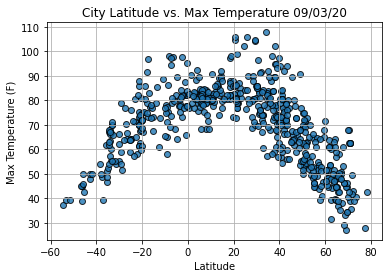

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

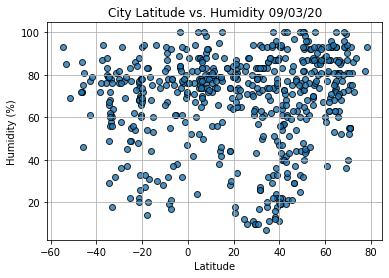

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

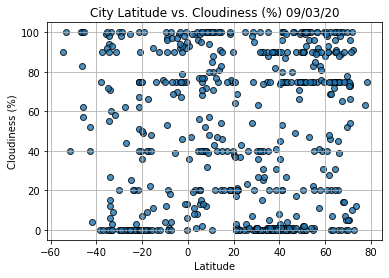

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

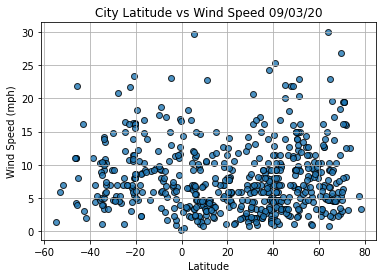

In [39]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed, edgecolor = 'black',
           linewidths=1, marker='o',
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig('weather_data/Fig4.png')
# Show the plot
plt.show()

In [40]:
# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values *slope +intercept
    # Get the equation of the line
    line_eq = 'y = ' +str(round(slope,2)) + 'x + ' +str(round(intercept, 2))
    # Create a scatter plot and plot the regression
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,'r')
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13= city_data_df.loc[13]
index13

City                         Chuy
Country                        UY
Date          2020-09-03 17:50:31
Lat                         -33.7
Lng                        -53.46
Max Temp                    54.61
Humidity                       77
Cloudiness                     80
Wind Speed                   9.62
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Husavik,IS,2020-09-03 17:50:29,66.04,-17.34,42.8,87,90,40.26
6,Clyde River,CA,2020-09-03 17:50:29,70.47,-68.59,42.8,81,75,8.05
7,Hilo,US,2020-09-03 17:46:48,19.73,-155.09,73.4,73,75,3.51
10,Anadyr,RU,2020-09-03 17:50:30,64.75,177.48,41.0,93,20,13.42
12,Katsuura,JP,2020-09-03 17:50:31,35.13,140.30,82.0,89,94,5.99


In [25]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']< 0)]

In [26]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Husavik,IS,2020-09-03 17:50:29,66.04,-17.34,42.8,87,90,40.26
6,Clyde River,CA,2020-09-03 17:50:29,70.47,-68.59,42.8,81,75,8.05
7,Hilo,US,2020-09-03 17:46:48,19.73,-155.09,73.4,73,75,3.51
10,Anadyr,RU,2020-09-03 17:50:30,64.75,177.48,41.0,93,20,13.42
12,Katsuura,JP,2020-09-03 17:50:31,35.13,140.30,82.0,89,94,5.99


In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

NameError: name 'linregress' is not defined